[1 - Importing Data](#importing)
* [1.1 - Train Data](#1-1-bullet)
* [1.2 - Test Data](#1-2-bullet)

[2 - Exploring Data](#exploring)
* [2.1 - Train Data](#2-1-bullet)
* [2.2 - Test Data](#2-2-bullet)

[3 - Data Preprocessing](#preprocessing)
* [3.1 - Fill Missing Values](#1st-bullet)
* [3.2 - Feature Engineering](#3-2-bullet)
* [3.3 - Split Data](#3-3-bullet)
* [3.4 - Outliers](#3-4-bullet)
* * [3.4.1 - Observation Method](#3-4-1-bullet)
* * [3.4.2 - IQR Method](#3-4-2-bullet)
* * [3.4.3 - Combining Both](#3-4-3-bullet)
* [3.5 - Correlations and Independence Test](#3-5-bullet)
* [3.6 - More Feature Engineering](#3-6-bullet)
* [3.7 - Scaler](#3-7-bullet)
* * [3.7.1 - Min Max Scaler](#3-7-1-bullet)
* * [3.7.2 - Standart Scaler](#3-7-2-bullet)
* [3.8 - One Hot Encoder](#3-8-bullet)

[4 - Data Exploration after Preprocessing](#exploration-2)

[5 - Modelling](#modelling)
* [5.1 - K Fold](#5-1-bullet)
* [5.2 - Test some Models](#5-2-bullet)
* * [5.2.1 - With Lazy Classifier](#5-2-1-bullet)
* * [5.2.2 - Grid Searches](#5-2-2-bullet)

[6 - Evaluation](#evaluation)

[7 - Deployment](#deployment)

In [473]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold,GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD

from lazypredict.Supervised import LazyClassifier

import scipy.stats as stats
from scipy.stats import chi2_contingency

from datetime import date

from math import ceil

import sys

import warnings
warnings.filterwarnings("ignore")
# pd.set_option('float_format', '{:f}'.format)


<a class="anchor" id="importing">

## `1. Importing Data`
    
</a>

<a class="anchor" id="1-1-bullet">

###  1.1 Train Data

</a>

In [474]:
train_demo=pd.read_excel('train_demo.xlsx')
train_habits=pd.read_excel('train_habits.xlsx')
train_health=pd.read_excel('train_health.xlsx')

In [475]:
print(train_demo.shape)
print(train_habits.shape)
print(train_health.shape)

(800, 6)
(800, 6)
(800, 9)


In [476]:
train_df = train_demo.merge(train_habits, on = 'PatientID').merge(train_health, on = 'PatientID')
train_df.head(3)


,PatientID,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
0,1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1,1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.
2,1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.


In [477]:
train_df.set_index('PatientID', inplace=True)

In [478]:
train_df.sort_index(axis=0, inplace=True)

In [479]:
train_df.head(3)

,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,,
1001,Mr. Charles Bolek,1969,East of England,High School Graduate,0,Yes,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,174,54,207,140,19,15,Not sure,Neither I nor my immediate family have diabetes.
1003,Mr. Boyd Cook,1961,Yorkshire and the Humber,High School Graduate,0,No,I usually consume alcohol every day,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,173,76,207,148,20,0,Not sure,Neither I nor my immediate family have diabetes.
1004,Mrs. Maggie Jones,1960,London,University Complete (3 or more years),0,Yes,I usually consume alcohol every day,No,5 to 6 pieces of fruit in average,Between one liter and two liters,155,59,298,138,8,9,More than 3 years,Neither I nor my immediate family have diabetes.


<a class="anchor" id="1-2-bullet">

###  1.2 Test Data

</a>

Doing the same but for test datasets!

In [480]:
test_demo=pd.read_excel('test_demo.xlsx')
test_habits=pd.read_excel('test_habits.xlsx')
test_health=pd.read_excel('test_health.xlsx')
print(test_demo.shape)
print(test_habits.shape)
print(test_health.shape)
test_df = test_demo.merge(test_habits, on = 'PatientID').merge(test_health, on = 'PatientID')
test_df.set_index('PatientID', inplace=True)
test_df.sample(3)

(225, 5)
(225, 6)
(225, 9)


,Name,Birth_Year,Region,Education,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,
1644,Mr. Mariano Shepherd,1978,North West,University Complete (3 or more years),No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,174,88,230,120,22,0,More than 3 years,I have/had pregnancy diabetes or borderline di...
1166,Mr. Alfred Reinwald,1966,London,Elementary School (1st to 9th grade),No,I consider myself a social drinker,Yes,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,172,70,188,132,7,10,Less than 3 years but more than 1 year,Neither I nor my immediate family have diabetes.
1830,Mr. Frank Craze,1971,South East,University Complete (3 or more years),No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Less than half a liter,173,71,226,100,16,5,More than 3 years,I have/had pregnancy diabetes or borderline di...


<a class="anchor" id="exploring">

## `2. Exploring Data`
    
</a>

<a class="anchor" id="2-1-bullet">

###  2.1 Train Data

</a>

In [481]:
train_df.shape

(800, 18)

In [482]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1001 to 2024
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         787 non-null    object
 4   Disease           800 non-null    int64 
 5   Smoking_Habit     800 non-null    object
 6   Drinking_Habit    800 non-null    object
 7   Exercise          800 non-null    object
 8   Fruit_Habit       800 non-null    object
 9   Water_Habit       800 non-null    object
 10  Height            800 non-null    int64 
 11  Weight            800 non-null    int64 
 12  High_Cholesterol  800 non-null    int64 
 13  Blood_Pressure    800 non-null    int64 
 14  Mental_Health     800 non-null    int64 
 15  Physical_Health   800 non-null    int64 
 16  Checkup           800 non-null    object
 17  Diabetes    

There are some missing values on variable "Education". We will solve this problem next.

In [483]:
train_df.value_counts('Disease')

Disease
1    411
0    389
dtype: int64

In [484]:
#Check for any kind of mistakes (some rows having disease with other value)
train_df['Disease'].unique()

array([0, 1], dtype=int64)

<a class="anchor" id="2-2-bullet">

###  2.2 Test Data

</a>

In [485]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 1343 to 1757
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              225 non-null    object
 1   Birth_Year        225 non-null    int64 
 2   Region            225 non-null    object
 3   Education         225 non-null    object
 4   Smoking_Habit     225 non-null    object
 5   Drinking_Habit    225 non-null    object
 6   Exercise          225 non-null    object
 7   Fruit_Habit       225 non-null    object
 8   Water_Habit       225 non-null    object
 9   Height            225 non-null    int64 
 10  Weight            225 non-null    int64 
 11  High_Cholesterol  225 non-null    int64 
 12  Blood_Pressure    225 non-null    int64 
 13  Mental_Health     225 non-null    int64 
 14  Physical_Health   225 non-null    int64 
 15  Checkup           225 non-null    object
 16  Diabetes          225 non-null    object
dtypes: int64(7),

<a class="anchor" id="preprocessing">

## `3. Data Preprocessing`
    
</a>

<a class="anchor" id="1st-bullet">


###  3.1 Fill Missing Values

</a>

In [486]:
train_df['Education'].fillna('Unknown', inplace = True)
train_df[train_df['Education']=='Unknown'].head(3)

,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,,
1048,Mrs. Margaret Wysong,1956,East Midlands,Unknown,1,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,166,67,282,146,18,0,More than 3 years,I have/had pregnancy diabetes or borderline di...
1072,Mr. Steven Fisher,1866,East Midlands,Unknown,0,Yes,I consider myself a social drinker,Yes,1 to 2 pieces of fruit in average,Between one liter and two liters,171,62,253,125,16,5,More than 3 years,Neither I nor my immediate family have diabetes.
1085,Mr. Robert Swenson,1978,South West,Unknown,1,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,165,72,224,120,22,0,More than 3 years,I do have diabetes


In [487]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1001 to 2024
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         800 non-null    object
 4   Disease           800 non-null    int64 
 5   Smoking_Habit     800 non-null    object
 6   Drinking_Habit    800 non-null    object
 7   Exercise          800 non-null    object
 8   Fruit_Habit       800 non-null    object
 9   Water_Habit       800 non-null    object
 10  Height            800 non-null    int64 
 11  Weight            800 non-null    int64 
 12  High_Cholesterol  800 non-null    int64 
 13  Blood_Pressure    800 non-null    int64 
 14  Mental_Health     800 non-null    int64 
 15  Physical_Health   800 non-null    int64 
 16  Checkup           800 non-null    object
 17  Diabetes    

<a class="anchor" id="3-2-bullet">


###  3.2 Feature Engineering
</a>

* Create Column gender based on Mr. and Mrs. of the variable 'Name'

In [488]:
train_df['Gender'] = train_df.apply(lambda row: 'Male' if row['Name'].startswith('Mr.') else 'Female', axis=1)

In [489]:
#Checking if it's right
train_df[['Name','Gender']]

,Name,Gender
PatientID,,
1001,Mr. Charles Bolek,Male
1003,Mr. Boyd Cook,Male
1004,Mrs. Maggie Jones,Female
1005,Mrs. Hazel Eison,Female
1006,Mr. Luis Pham,Male
...,...,...
2019,Mr. William Hurd,Male
2020,Mr. Jim Garrett,Male
2022,Mr. Barry Holman,Male


<a class="anchor" id="3-3-bullet">


###  3.3 Split Data

</a>

In [490]:
#Target variable
train_data = train_df.drop('Disease', axis=1).copy()
train_target = train_df['Disease'].copy()

In [491]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_target, test_size = 0.15, random_state=10
                                                    ,shuffle=True, stratify=train_target)

In [492]:
y_test

PatientID
1121    0
1034    1
1201    1
1073    0
1285    1
       ..
1992    1
1906    1
1592    0
1933    0
1730    1
Name: Disease, Length: 120, dtype: int64

In [493]:
y_train

PatientID
1585    1
1481    0
1009    0
1206    0
1560    1
       ..
1515    0
1921    0
1021    1
1523    0
1434    1
Name: Disease, Length: 680, dtype: int64

In [494]:
X_test.head(3)

,Name,Birth_Year,Region,Education,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Gender
PatientID,,,,,,,,,,,,,,,,,,
1121,Mr. George Knight,1978,South West,High School Graduate,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,174,54,173,120,16,13,Less than 3 years but more than 1 year,Neither I nor my immediate family have diabetes.,Male
1034,Mr. Matt Scott,1972,West Midlands,University Incomplete (1 to 2 years),No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,178,81,200,129,21,0,More than 3 years,I have/had pregnancy diabetes or borderline di...,Male
1201,Mr. Micheal Carter,1988,East Midlands,High School Graduate,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,178,92,186,118,23,0,More than 3 years,"I don't have diabetes, but I have direct famil...",Male


In [495]:
train_data_num = X_train.select_dtypes(include=np.number).set_index(X_train.index).copy()
train_data_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index).copy()

test_data_num = X_test.select_dtypes(include=np.number).set_index(X_test.index).copy()
test_data_cat = X_test.select_dtypes(exclude=np.number).set_index(X_test.index).copy()

<a class="anchor" id="3-4-bullet">


###  3.4 Outliers

</a>

In [496]:
train_data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Birth_Year,680.00,1966.13,15.69,1859.00,1961.00,1966.00,1974.00,1993.00
Height,680.00,167.86,7.85,151.00,162.00,167.00,173.00,180.00
Weight,680.00,67.77,12.13,40.00,58.00,68.00,76.00,97.00
High_Cholesterol,680.00,248.74,50.39,130.00,213.00,243.00,279.00,568.00
Blood_Pressure,680.00,131.08,17.36,94.00,120.00,130.00,140.00,200.00
Mental_Health,680.00,17.40,5.42,0.00,13.00,18.00,21.00,29.00
Physical_Health,680.00,4.55,5.44,0.00,0.00,3.00,7.00,30.00


In [497]:
def box_plot_all_vars(data):
    # All Numeric Variables' Box Plots in one figure
    sns.set()

    # Prepare figure. Create individual axes where each box plot will be placed
    fig, axes = plt.subplots(3, ceil(len(data.columns.to_list()) / 3), figsize=(25, 20))

    # Plot data
    # Iterate across axes objects and associate each box plot (hint: use the ax argument):
    for ax, feat in zip(axes.flatten(), data.columns.to_list()): # Notice the zip() function and flatten() method
        bxplot = sns.boxplot(x=data[feat], ax=ax, color='chartreuse', fliersize=8)
        bxplot.set_xlabel(fontsize=16, xlabel=feat)
        
    # Layout
    # Add a centered title to the figure:
    title = "Numeric Variables' Box Plots"

    plt.suptitle(title, size=30)

    plt.show()

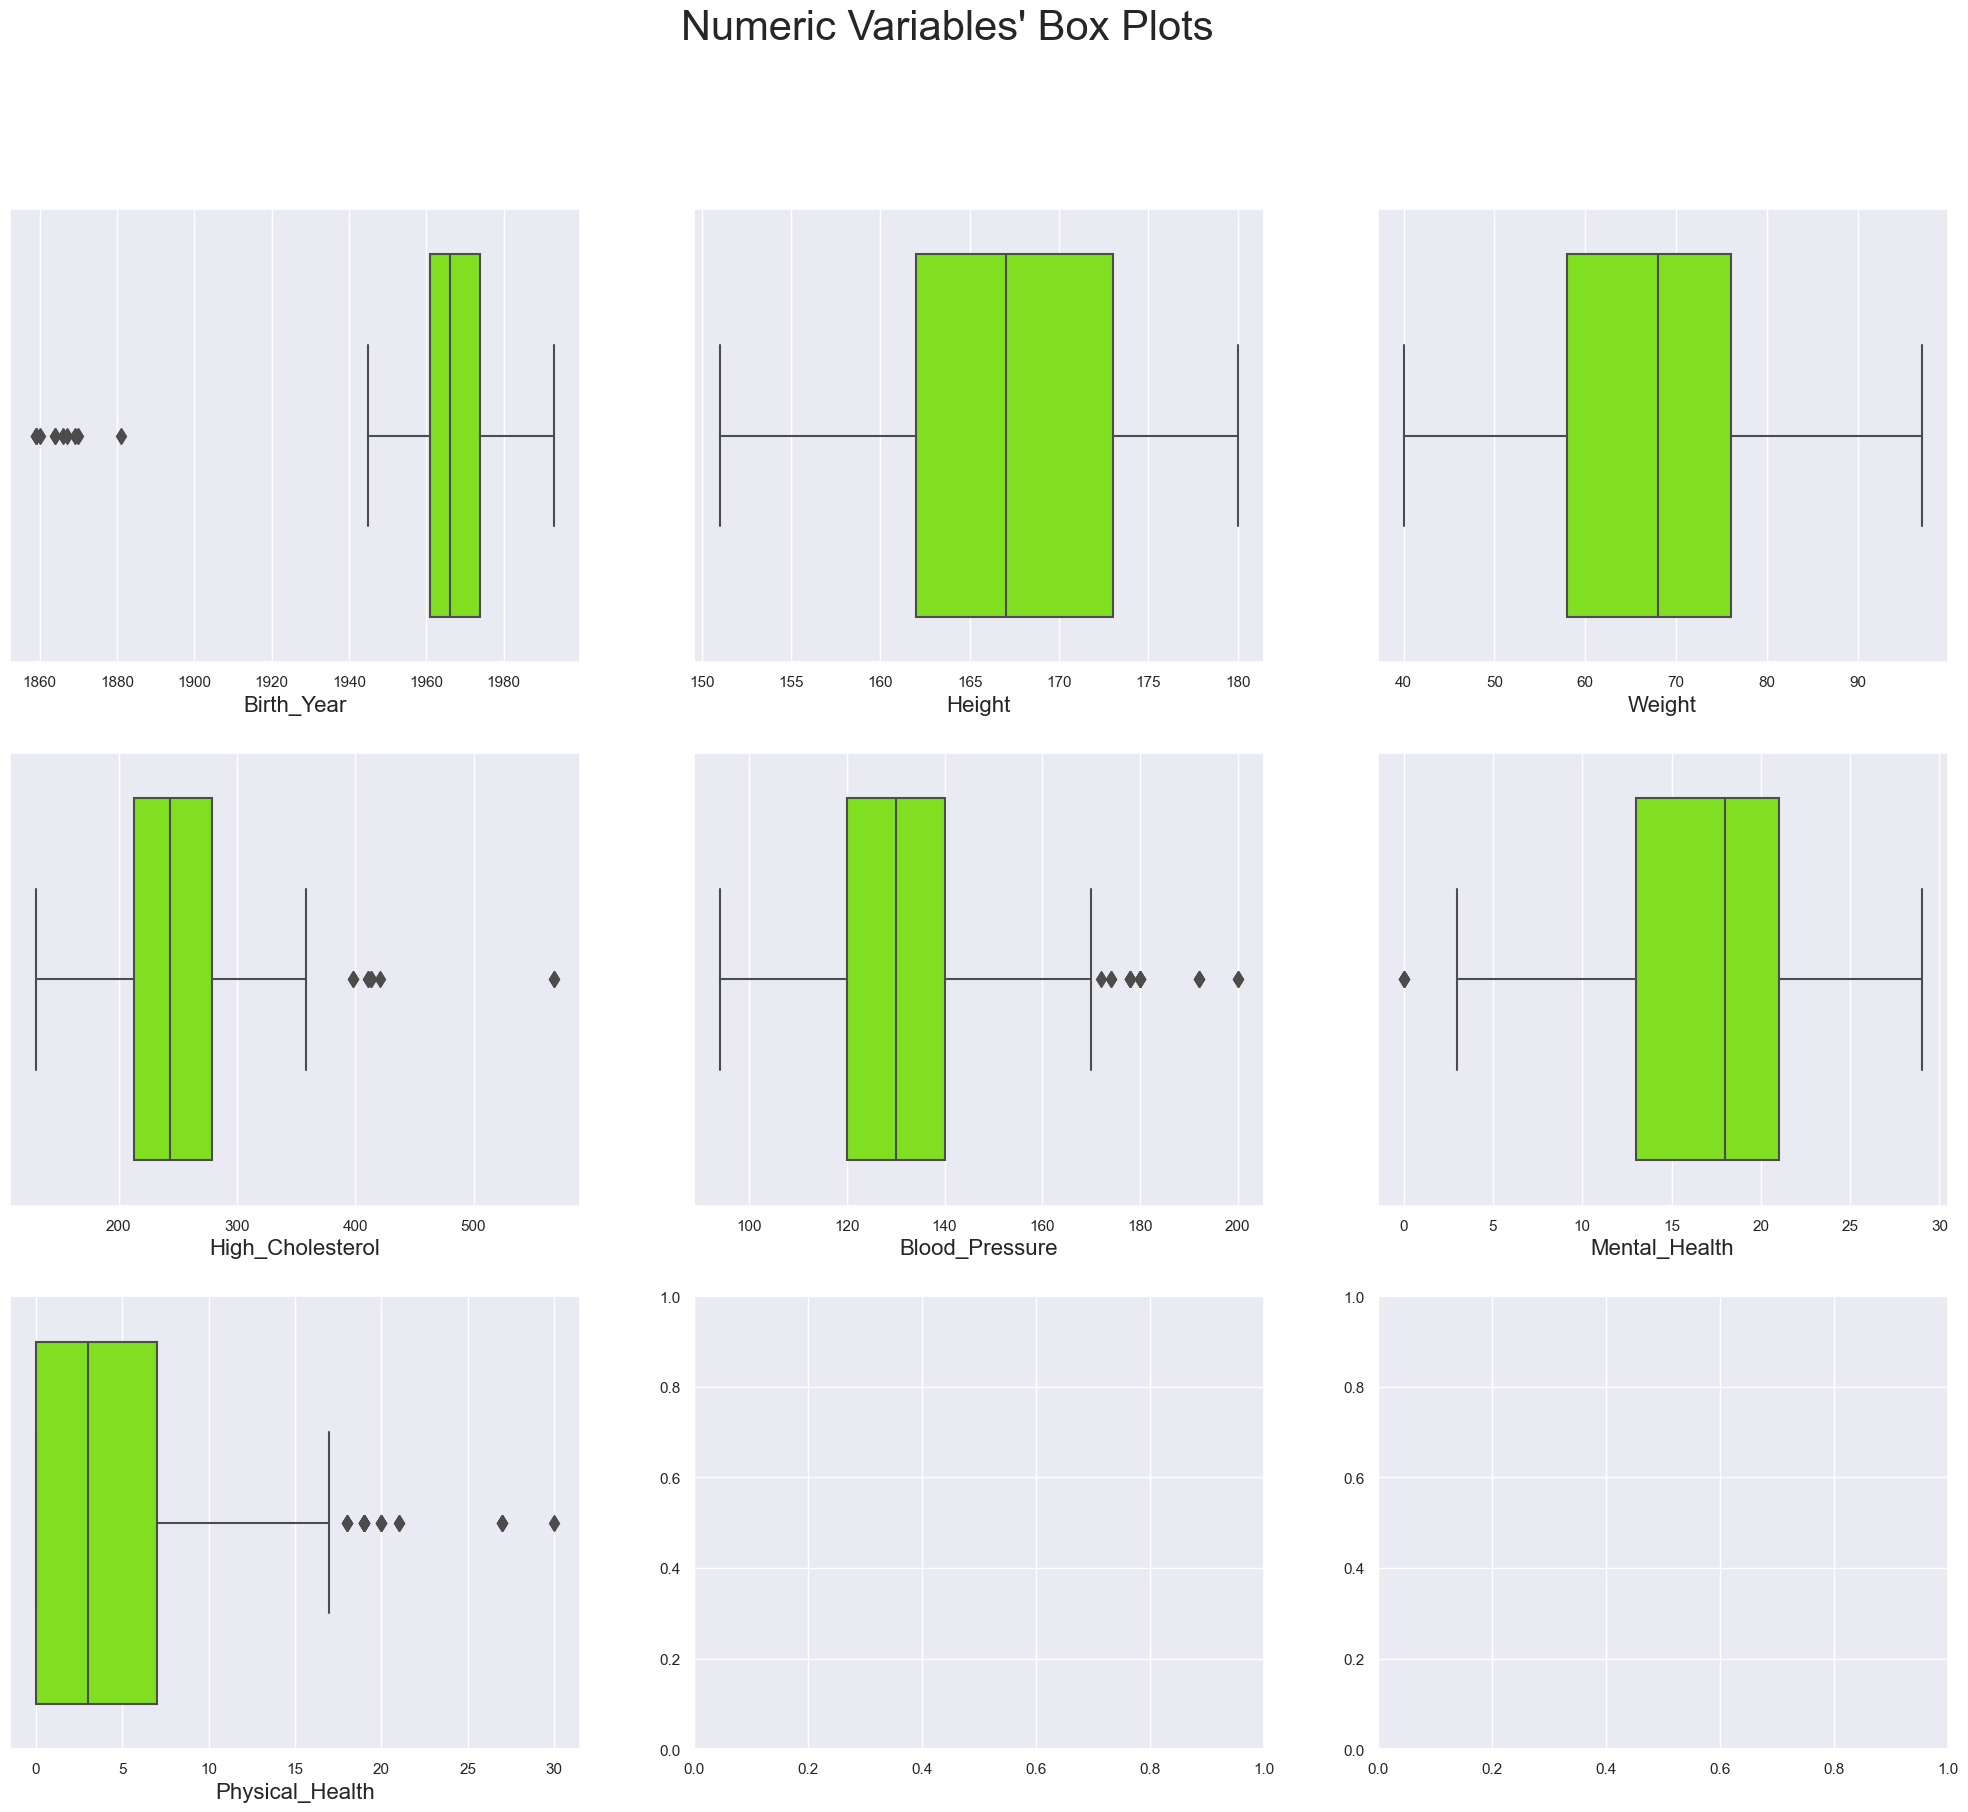

In [498]:
box_plot_all_vars(train_data_num)

<a class="anchor" id="3-4-1-bullet">


> ##### 3.4.1 Observation Method

</a>

In [499]:
filters1 = (
    (train_data_num['Birth_Year']>=1940)
    &
    (train_data_num['Weight']>=45)
    &
    (train_data_num['High_Cholesterol']<=350)
    &
    (train_data_num['Blood_Pressure']>=96)
    &
    (train_data_num['Blood_Pressure']<=180)
    &
    (train_data_num['Physical_Health']<=20)
)

df_1 = train_data_num[filters1]
print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / train_data_num.shape[0], 4))

Percentage of data kept after removing outliers: 0.9412


In [500]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Birth_Year,640.00,1967.89,8.99,1945.00,1962.00,1966.00,1975.00,1993.00
Height,640.00,168.05,7.74,151.00,162.00,171.00,173.00,180.00
Weight,640.00,68.21,11.90,45.00,59.00,68.00,77.00,97.00
High_Cholesterol,640.00,244.89,43.59,130.00,212.00,241.00,277.00,346.00
Blood_Pressure,640.00,130.76,16.48,100.00,120.00,130.00,140.00,180.00
Mental_Health,640.00,17.35,5.45,0.00,13.00,18.00,21.00,29.00
Physical_Health,640.00,4.28,5.00,0.00,0.00,2.00,7.00,20.00


In [501]:
#Number of records
print(train_data_num.shape[0])
print(df_1.shape[0])

680
640


<a class="anchor" id="3-4-2-bullet">


> ##### 3.4.2 IQR Method

</a>

In [502]:
metric_features = train_data_num.columns.to_list()
q25 = train_data_num.quantile(.25)
q75 = train_data_num.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(train_data_num[metric].between(llim, ulim, inclusive=True))

filters2 = pd.Series(np.all(filters2, 0))
df_2=train_data_num.copy()
df_2['filters2'] = filters2.to_list()
df_2=df_2[df_2['filters2']!=False]
print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / train_data_num.shape[0], 4))

Percentage of data kept after removing outliers: 0.9206


In [503]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Birth_Year,626.00,1968.12,8.88,1945.00,1962.00,1967.00,1975.00,1993.00
Height,626.00,168.10,7.81,151.00,162.00,171.00,173.00,180.00
Weight,626.00,68.33,12.07,41.00,59.00,69.00,77.00,97.00
High_Cholesterol,626.00,245.29,44.66,130.00,212.00,241.50,277.00,358.00
Blood_Pressure,626.00,129.73,15.50,94.00,120.00,130.00,140.00,170.00
Mental_Health,626.00,17.41,5.36,3.00,13.00,18.00,21.00,29.00
Physical_Health,626.00,4.03,4.66,0.00,0.00,2.00,7.00,17.00


In [504]:
#Number of records
print(train_data_num.shape[0])
print(df_2.shape[0])

680
626


<a class="anchor" id="3-4-3-bullet">


> ##### 3.4.3 Combining both methods

</a>

In [505]:
df_3 = train_data_num.copy()
df_3['filters1'] = filters1.to_list()
df_3['filters2'] = filters2.to_list()
df_3 = df_3[(df_3['filters1']==True) | (df_3['filters2']==True)]
print('Percentage of data kept after removing outliers:', np.round(df_3.shape[0] / train_data_num.shape[0], 4))

Percentage of data kept after removing outliers: 0.9574


In [506]:
# Choose df_3
train_data_num=df_3.copy()

##### Remove from train_data_cat and train_target all records removed on train_data_num
##### Drop from train_data_num columns filters1 and filters2


In [507]:
train_data_cat=train_data_cat[train_data_cat.index.isin(train_data_num.index)]
y_train=y_train[y_train.index.isin(train_data_num.index)]
train_data_num.drop(['filters1', 'filters2'], axis=1, inplace=True)
train_data_num

,Birth_Year,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
PatientID,,,,,,,
1585,1982,162,71,203,140,24,6
1009,1968,174,70,290,122,10,15
1206,1963,171,60,222,126,14,10
1560,1964,157,47,201,130,13,2
1403,1976,154,61,208,105,23,0
...,...,...,...,...,...,...,...
1515,1973,180,62,192,120,15,9
1921,1964,171,71,222,146,7,9
1021,1955,155,72,227,106,16,1


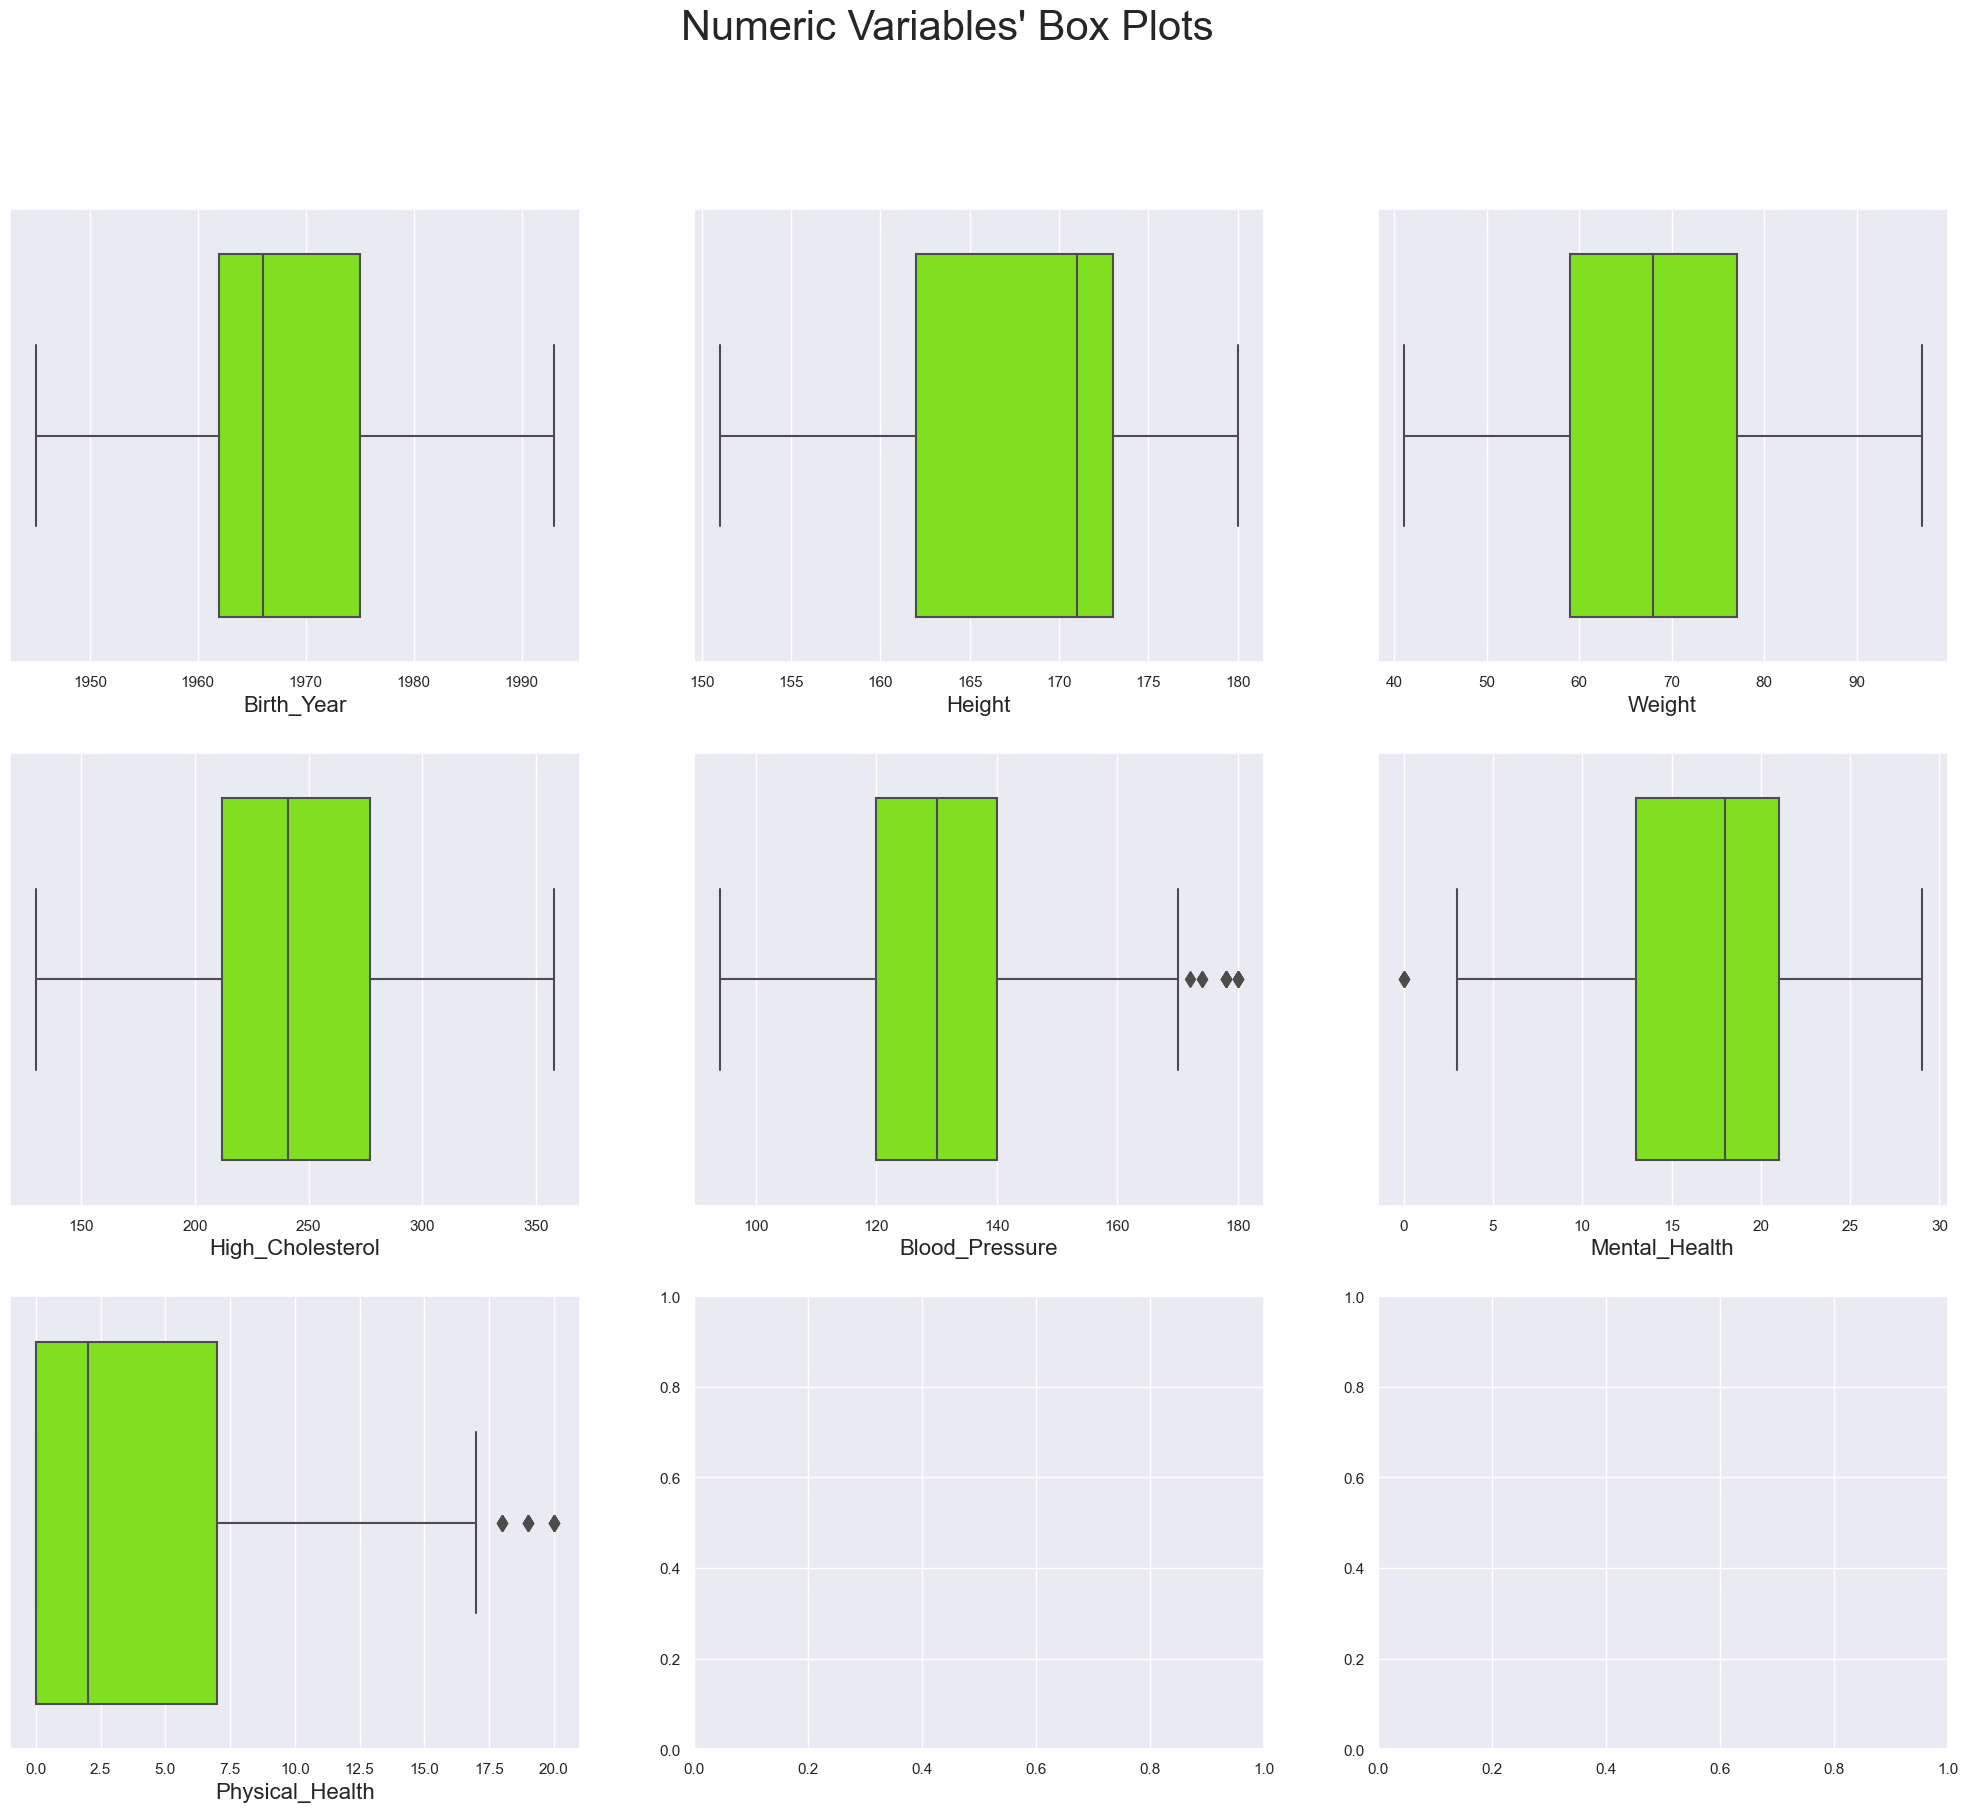

In [508]:
box_plot_all_vars(train_data_num)

<a class="anchor" id="3-5-bullet">


###  3.5 Correlations and Independence Test

</a>

In [509]:
#create df with target variable to check correlations
train_data_corr=train_data_num.join(y_train)

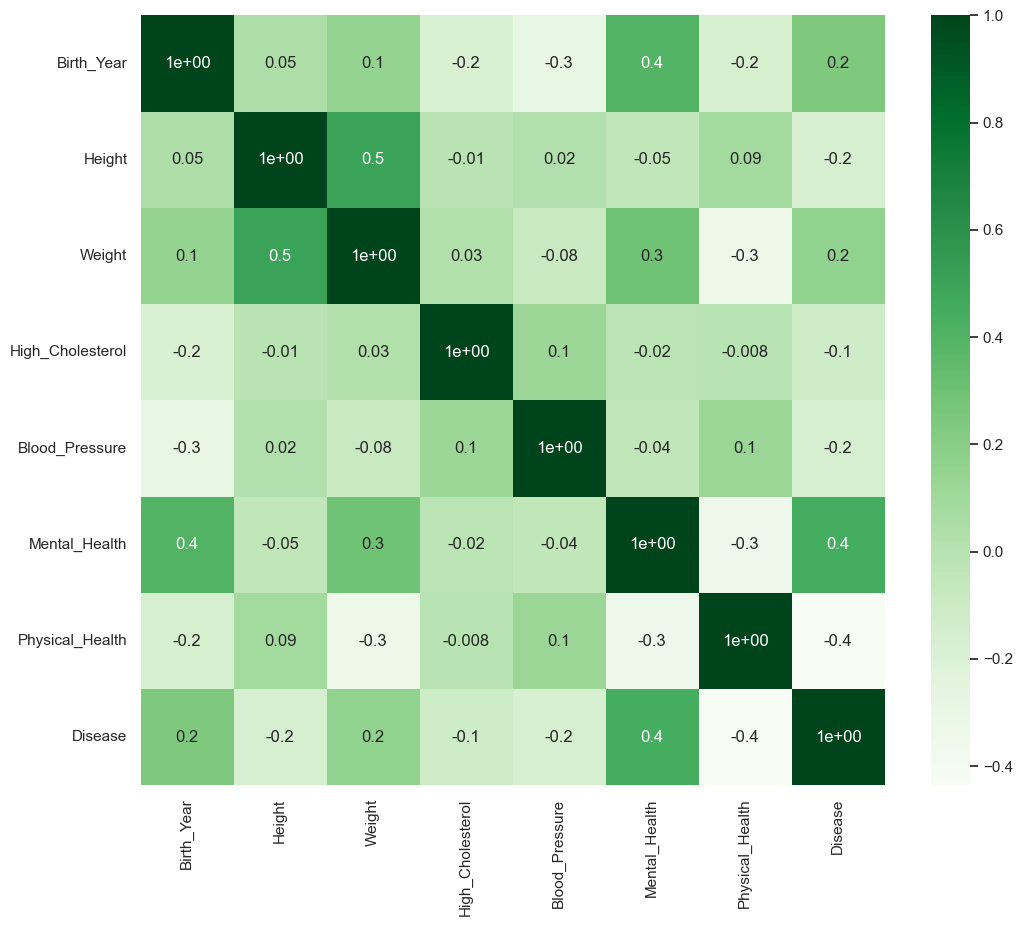

In [510]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Greens, fmt='.1')
    plt.show()
cor_pearson = train_data_corr.corr()
cor_heatmap(cor_pearson)

Theres no highly correlated variable to drop

In [511]:
def Test_Independence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [512]:
for var in train_data_cat:
    Test_Independence(train_data_cat[var],y_train, var)

Name is NOT an important predictor. (Discard Name from model)
Region is NOT an important predictor. (Discard Region from model)
Education is NOT an important predictor. (Discard Education from model)
Smoking_Habit is IMPORTANT for Prediction
Drinking_Habit is IMPORTANT for Prediction
Exercise is IMPORTANT for Prediction
Fruit_Habit is IMPORTANT for Prediction
Water_Habit is NOT an important predictor. (Discard Water_Habit from model)
Checkup is IMPORTANT for Prediction
Diabetes is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction


In [513]:
# train_data_cat.drop(['Name', 'Region', 'Education', 'Smoking_Habit', 'Water_Habit'],axis=1, inplace=True)
# test_data_cat.drop(['Name', 'Region', 'Education', 'Smoking_Habit', 'Water_Habit'],axis=1, inplace=True)
train_data_cat.drop(['Name', 'Region', 'Education', 'Water_Habit'],axis=1, inplace=True)
test_data_cat.drop(['Name', 'Region', 'Education', 'Water_Habit'],axis=1, inplace=True)

<a class="anchor" id="3-6-bullet">


###  3.6 More Feature Engineering

</a>

* Convert yes/no to 1/0 - Exercise and Smoking_Habit

In [514]:
train_data_cat['Exercise']=pd.Series(np.where(train_data_cat.Exercise.values == 'Yes', 1, 0),train_data_cat.index)

test_data_cat['Exercise']=pd.Series(np.where(test_data_cat.Exercise.values == 'Yes', 1, 0),test_data_cat.index)

train_data_cat['Smoking_Habit']=pd.Series(np.where(train_data_cat.Smoking_Habit.values == 'Yes', 1, 0),train_data_cat.index)

test_data_cat['Smoking_Habit']=pd.Series(np.where(test_data_cat.Smoking_Habit.values == 'Yes', 1, 0),test_data_cat.index)

* Convert Birth_Year to Age

In [515]:
def age(birthdate):
    year = date.today().year
    age = year - birthdate 
    return age

In [516]:
train_data_num['Birth_Year'] = train_data_num['Birth_Year'].apply(lambda x: age(x))
train_data_num.rename(columns = {'Birth_Year':'Age'}, inplace=True)

test_data_num['Birth_Year'] = test_data_num['Birth_Year'].apply(lambda x: age(x))
test_data_num.rename(columns = {'Birth_Year':'Age'}, inplace=True)

* ### Rename unique values to shorter values
> * Drinking Habit

In [517]:
train_data_cat['Drinking_Habit'].unique()

array(['I usually consume alcohol every day',
       'I consider myself a social drinker',
       'I do not consume any type of alcohol'], dtype=object)

In [518]:
#Rename to shorter values
dict_drinking_habit = {"I consider myself a social drinker" : 'Social drinker',  'I usually consume alcohol every day' : 'Every day', "I do not consume any type of alcohol": 'Not consume'}
train_data_cat.replace({"Drinking_Habit": dict_drinking_habit}, inplace=True)
test_data_cat.replace({"Drinking_Habit": dict_drinking_habit}, inplace=True)

> * Fruit Habit

In [519]:
train_data_cat['Fruit_Habit'].unique()

array(['Less than 1. I do not consume fruits every day.',
       '3 to 4 pieces of fruit in average',
       '1 to 2 pieces of fruit in average',
       '5 to 6 pieces of fruit in average',
       'More than six pieces of fruit'], dtype=object)

In [520]:
#Rename to shorter values
dict_fruit_habit = {"Less than 1. I do not consume fruits every day." : 'Not Consume',
  '1 to 2 pieces of fruit in average' : '1-2',
   "3 to 4 pieces of fruit in average": '3-4',
   '5 to 6 pieces of fruit in average' : '5-6',
   'More than six pieces of fruit' : 'More than 6'}
train_data_cat.replace({"Fruit_Habit": dict_fruit_habit}, inplace=True)
test_data_cat.replace({"Fruit_Habit": dict_fruit_habit}, inplace=True)


> * Checkup

In [521]:
train_data_cat['Checkup'].unique()

array(['Not sure', 'More than 3 years',
       'Less than 3 years but more than 1 year', 'Less than three months'],
      dtype=object)

In [522]:
#Shortening values
dict_checkup = {"Less than 3 years but more than 1 year" : '1-3 years',  'Less than three months' : 'Less than 3 months'}
train_data_cat.replace({"Checkup": dict_checkup}, inplace=True)
test_data_cat.replace({"Checkup": dict_checkup}, inplace=True)


> * Diabetes

In [523]:
train_data_cat['Diabetes'].unique()

array(["I don't have diabetes, but I have direct family members who have diabetes.",
       'Neither I nor my immediate family have diabetes.',
       'I have/had pregnancy diabetes or borderline diabetes',
       'I do have diabetes'], dtype=object)

In [524]:
#Rename to shorter values
dict_diabetes = {"Neither I nor my immediate family have diabetes." : 'Neither I nor my immediate family',
  "I don't have diabetes, but I have direct family members who have diabetes." : "I don't, but direct family members have",
   "I do have diabetes" : 'Yes',  
   'I have/had pregnancy diabetes or borderline diabetes' : 'Pregnancy or Borderline Diabetes'}
train_data_cat.replace({"Diabetes": dict_diabetes}, inplace=True)
test_data_cat.replace({"Diabetes": dict_diabetes}, inplace=True)

> * Gender

In [525]:
#Change gender to 'Gender Male' in order to have 0/1 values
train_data_cat['Gender'].replace(['Male'], 1, inplace=True)
train_data_cat['Gender'].replace(['Female'], 0, inplace=True)
train_data_cat.rename(columns={'Gender':'Gender Male'}, inplace=True)

test_data_cat['Gender'].replace(['Male'], 1, inplace=True)
test_data_cat['Gender'].replace(['Female'], 0, inplace=True)
test_data_cat.rename(columns={'Gender':'Gender Male'}, inplace=True)

In [526]:
train_data_cat.sample(5)

,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Checkup,Diabetes,Gender Male
PatientID,,,,,,,
1780,0,Every day,1,Not Consume,1-3 years,Neither I nor my immediate family,1
1216,0,Social drinker,0,1-2,Not sure,Neither I nor my immediate family,1
1033,0,Every day,1,1-2,Not sure,Pregnancy or Borderline Diabetes,1
1494,1,Social drinker,0,Not Consume,More than 3 years,Pregnancy or Borderline Diabetes,1
1100,0,Every day,0,Not Consume,More than 3 years,Pregnancy or Borderline Diabetes,0


> * All previous steps but for test_df

In [527]:
test_df_num = test_df.select_dtypes(include=np.number).set_index(test_df.index).copy()
test_df_cat = test_df.select_dtypes(exclude=np.number).set_index(test_df.index).copy()

test_df_cat['Gender'] = test_df.apply(lambda row: 'Male' if row['Name'].startswith('Mr.') else 'Female', axis=1)
test_df_cat['Smoking_Habit']=pd.Series(np.where(test_df.Smoking_Habit.values == 'Yes', 1, 0),test_df.index)
test_df_cat['Exercise']=pd.Series(np.where(test_df.Exercise.values == 'Yes', 1, 0),test_df.index)
test_df_num['Birth_Year'] = test_df['Birth_Year'].apply(lambda x: age(x))
test_df_num.rename(columns = {'Birth_Year':'Age'}, inplace=True)


test_df_cat.replace({"Drinking_Habit": dict_drinking_habit}, inplace=True)
test_df_cat.replace({"Fruit_Habit": dict_fruit_habit}, inplace=True)
test_df_cat.replace({"Checkup": dict_checkup}, inplace=True)
test_df_cat.replace({"Diabetes": dict_diabetes}, inplace=True)
test_df_cat['Gender'].replace(['Male'], 1, inplace=True)
test_df_cat['Gender'].replace(['Female'], 0, inplace=True)
test_df_cat.rename(columns={'Gender':'Gender Male'}, inplace=True)



<a class="anchor" id="3-7-bullet">


###  3.7 Scaler

</a>

<a class="anchor" id="3-7-1-bullet">


> ##### 3.7.1 Min Max Scaler

</a>

In [528]:
scaler = MinMaxScaler()
train_data_num_scaled = scaler.fit_transform(train_data_num)
train_data_num_scaled = pd.DataFrame(train_data_num_scaled, columns = train_data_num.columns).set_index(train_data_num.index)

test_data_num_scaled = scaler.transform(test_data_num)
test_data_num_scaled = pd.DataFrame(test_data_num_scaled, columns = test_data_num.columns).set_index(test_data_num.index)

train_data_num_scaled.head(3)

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
PatientID,,,,,,,
1585,0.23,0.38,0.54,0.32,0.53,0.83,0.30
1009,0.52,0.79,0.52,0.70,0.33,0.34,0.75
1206,0.62,0.69,0.34,0.40,0.37,0.48,0.50


Text(0.5, 0.98, 'Distributions After Min Max Scaler')

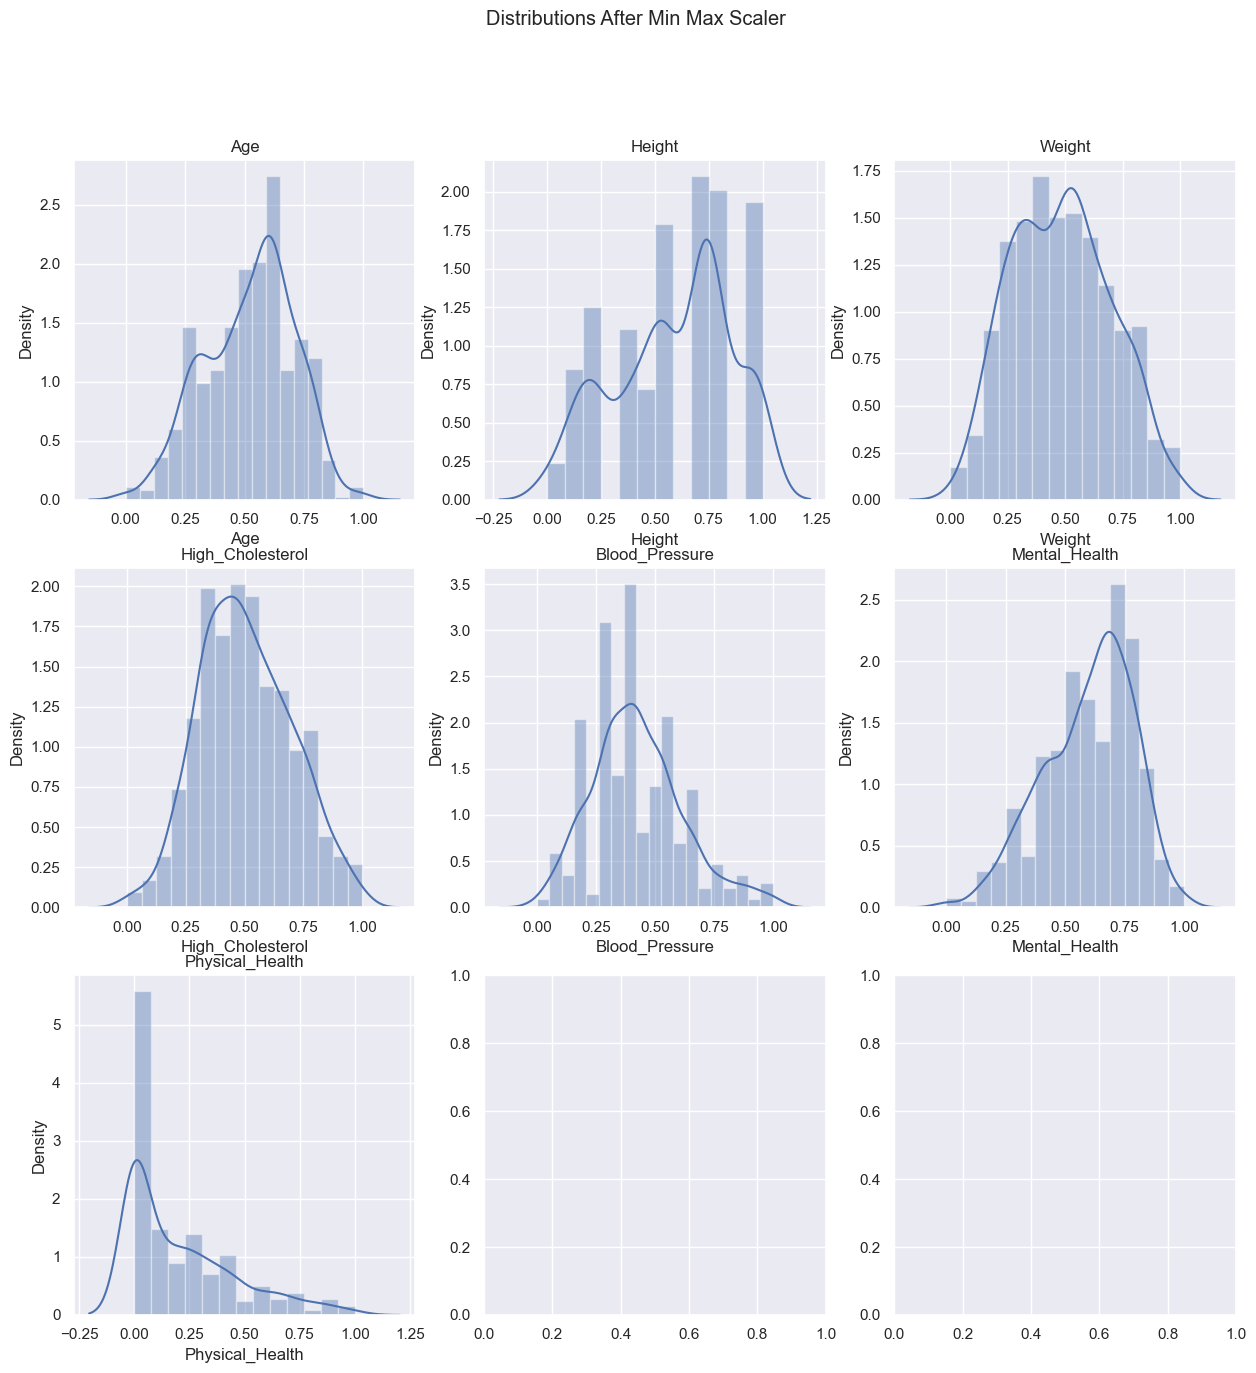

In [529]:
fig, axes = plt.subplots(nrows = 3, ncols = 3)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(15, 15)

for ax, col in zip(axes, train_data_num_scaled.columns):
  sns.distplot(train_data_num_scaled[col], ax = ax)
  ax.set_title(col)

fig.suptitle('Distributions After Min Max Scaler')

In [530]:
train_data_num_scaled.var()

Age                0.03
Height             0.07
Weight             0.05
High_Cholesterol   0.04
Blood_Pressure     0.04
Mental_Health      0.04
Physical_Health    0.06
dtype: float64

<a class="anchor" id="3-7-2-bullet">


> ##### 3.7.2 Standard Scaler

</a>

In [531]:
# st_scaler = StandardScaler()
# train_data_num_st_scaled = st_scaler.fit_transform(train_data_num)
# train_data_num_st_scaled = pd.DataFrame(train_data_num_st_scaled, columns = train_data_num.columns).set_index(train_data_num.index)

# test_data_num_st_scaled = st_scaler.transform(test_data_num)
# test_data_num_st_scaled = pd.DataFrame(test_data_num_st_scaled, columns = test_data_num.columns).set_index(test_data_num.index)

# train_data_num_st_scaled.head(3)

In [532]:
# fig, axes = plt.subplots(nrows = 3, ncols = 3)    # axes is 2d array (3x3)
# axes = axes.flatten()         # Convert axes to 1d array of length 9
# fig.set_size_inches(15, 15)

# for ax, col in zip(axes, train_data_num_st_scaled.columns):
#   sns.distplot(train_data_num_st_scaled[col], ax = ax, color='red')
#   ax.set_title(col)

# fig.suptitle('Distributions After Standard Scaler')

In [533]:
# train_data_num_st_scaled.var()

Let's keep with min max scaler data

> * All previous steps but for test_df:

In [534]:
test_df_scaled = scaler.transform(test_df_num)
test_df_scaled = pd.DataFrame(test_df_scaled, columns = test_df_num.columns).set_index(test_df_num.index)
# test_df_cat.drop(['Name', 'Region', 'Education', 'Smoking_Habit', 'Water_Habit'],axis=1, inplace=True)
test_df_cat.drop(['Name', 'Region', 'Education', 'Water_Habit'],axis=1, inplace=True)

<a class="anchor" id="3-8-bullet">


###  3.8 One Hot Encoder

</a>

In [535]:
df_ohc = train_data_cat.copy()
train_data_cat_plot = train_data_cat.copy()

ohc = OneHotEncoder(sparse=False)
ohc_feat = ohc.fit_transform(df_ohc.drop(['Exercise', 'Gender Male', 'Smoking_Habit'], axis=1))
ohc_feat_names = ohc.get_feature_names_out()
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)
ohc_df

,Drinking_Habit_Every day,Drinking_Habit_Not consume,Drinking_Habit_Social drinker,Fruit_Habit_1-2,Fruit_Habit_3-4,Fruit_Habit_5-6,Fruit_Habit_More than 6,Fruit_Habit_Not Consume,Checkup_1-3 years,Checkup_Less than 3 months,Checkup_More than 3 years,Checkup_Not sure,"Diabetes_I don't, but direct family members have",Diabetes_Neither I nor my immediate family,Diabetes_Pregnancy or Borderline Diabetes,Diabetes_Yes
PatientID,,,,,,,,,,,,,,,,
1585,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00
1009,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
1206,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1560,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
1403,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
1921,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
1021,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00


In [536]:
#Apply to test split too
df_ohc_test = test_data_cat.copy()
ohc_feat_test = ohc.fit_transform(df_ohc_test.drop(['Exercise', 'Gender Male', 'Smoking_Habit'], axis=1))
ohc_feat_names_test = ohc.get_feature_names_out()
ohc_df_test = pd.DataFrame(ohc_feat_test, index=df_ohc_test.index, columns=ohc_feat_names_test)

In [537]:
#Concat one hot encoder with the other 2 categorical features (dummy variables)
train_data_cat  = pd.concat([train_data_cat,ohc_df],axis = 1)
train_data_cat.drop(['Drinking_Habit', 'Fruit_Habit', 'Checkup', 'Diabetes'], inplace=True, axis=1)

test_data_cat  = pd.concat([test_data_cat,ohc_df_test],axis = 1)
test_data_cat.drop(['Drinking_Habit', 'Fruit_Habit', 'Checkup', 'Diabetes'], inplace=True, axis=1)

train_data_cat

,Smoking_Habit,Exercise,Gender Male,Drinking_Habit_Every day,Drinking_Habit_Not consume,Drinking_Habit_Social drinker,Fruit_Habit_1-2,Fruit_Habit_3-4,Fruit_Habit_5-6,Fruit_Habit_More than 6,Fruit_Habit_Not Consume,Checkup_1-3 years,Checkup_Less than 3 months,Checkup_More than 3 years,Checkup_Not sure,"Diabetes_I don't, but direct family members have",Diabetes_Neither I nor my immediate family,Diabetes_Pregnancy or Borderline Diabetes,Diabetes_Yes
PatientID,,,,,,,,,,,,,,,,,,,
1585,0,1,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00
1009,0,1,1,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
1206,1,0,1,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1560,0,0,0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
1403,0,0,0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,0,0,1,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
1921,0,0,1,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
1021,0,0,0,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00


In [538]:
#concat categorical features with remaining dataset
X_train=train_data_num_scaled.merge(train_data_cat, on = 'PatientID')

X_test=test_data_num_scaled.merge(test_data_cat, on = 'PatientID')

test_data_cat

,Smoking_Habit,Exercise,Gender Male,Drinking_Habit_Every day,Drinking_Habit_Not consume,Drinking_Habit_Social drinker,Fruit_Habit_1-2,Fruit_Habit_3-4,Fruit_Habit_5-6,Fruit_Habit_More than 6,Fruit_Habit_Not Consume,Checkup_1-3 years,Checkup_Less than 3 months,Checkup_More than 3 years,Checkup_Not sure,"Diabetes_I don't, but direct family members have",Diabetes_Neither I nor my immediate family,Diabetes_Pregnancy or Borderline Diabetes,Diabetes_Yes
PatientID,,,,,,,,,,,,,,,,,,,
1121,0,1,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
1034,0,0,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
1201,0,0,1,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
1073,0,1,1,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
1285,1,0,0,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,0,0,0,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
1906,0,0,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
1592,0,1,1,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00


> * All previous steps but for test_df:

In [539]:
df_ohc = test_df_cat.copy()
ohc_feat = ohc.fit_transform(df_ohc.drop(['Exercise', 'Gender Male', 'Smoking_Habit'], axis=1))
ohc_feat_names = ohc.get_feature_names_out()
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)
ohc_df
test_df_cat  = pd.concat([test_df_cat,ohc_df],axis = 1)
test_df_cat.drop(['Drinking_Habit', 'Fruit_Habit', 'Checkup', 'Diabetes'], inplace=True, axis=1)
test_df_cat
test_data=test_df_scaled.merge(test_df_cat, on = 'PatientID')

In [540]:
test_data.head(3)

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Smoking_Habit,Exercise,Gender Male,...,Fruit_Habit_More than 6,Fruit_Habit_Not Consume,Checkup_1-3 years,Checkup_Less than 3 months,Checkup_More than 3 years,Checkup_Not sure,"Diabetes_I don't, but direct family members have",Diabetes_Neither I nor my immediate family,Diabetes_Pregnancy or Borderline Diabetes,Diabetes_Yes
PatientID,,,,,,,,,,,,,,,,,,,,,
1343,0.48,0.72,0.70,0.32,0.91,0.69,0.10,1,0,1,...,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
1727,0.56,0.69,0.70,0.42,0.42,0.72,0.00,0,0,1,...,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
1828,0.31,0.69,0.66,0.47,0.42,0.83,0.05,0,1,1,...,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00


<a class="anchor" id="exploration-2">

## `4. Data Exploration after Preprocessing`
    
</a>

In [541]:
ncols = len(train_data_cat_plot.columns)
train_data_cat_plot

,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Checkup,Diabetes,Gender Male
PatientID,,,,,,,
1585,0,Every day,1,Not Consume,Not sure,"I don't, but direct family members have",1
1009,0,Social drinker,1,3-4,More than 3 years,Neither I nor my immediate family,1
1206,1,Every day,0,1-2,1-3 years,Pregnancy or Borderline Diabetes,1
1560,0,Every day,0,Not Consume,More than 3 years,Neither I nor my immediate family,0
1403,0,Every day,0,Not Consume,More than 3 years,Yes,0
...,...,...,...,...,...,...,...
1515,0,Every day,0,5-6,Not sure,Pregnancy or Borderline Diabetes,1
1921,0,Every day,0,1-2,Not sure,Neither I nor my immediate family,1
1021,0,Every day,0,3-4,More than 3 years,Neither I nor my immediate family,0


> * Countplots of the categorical variables

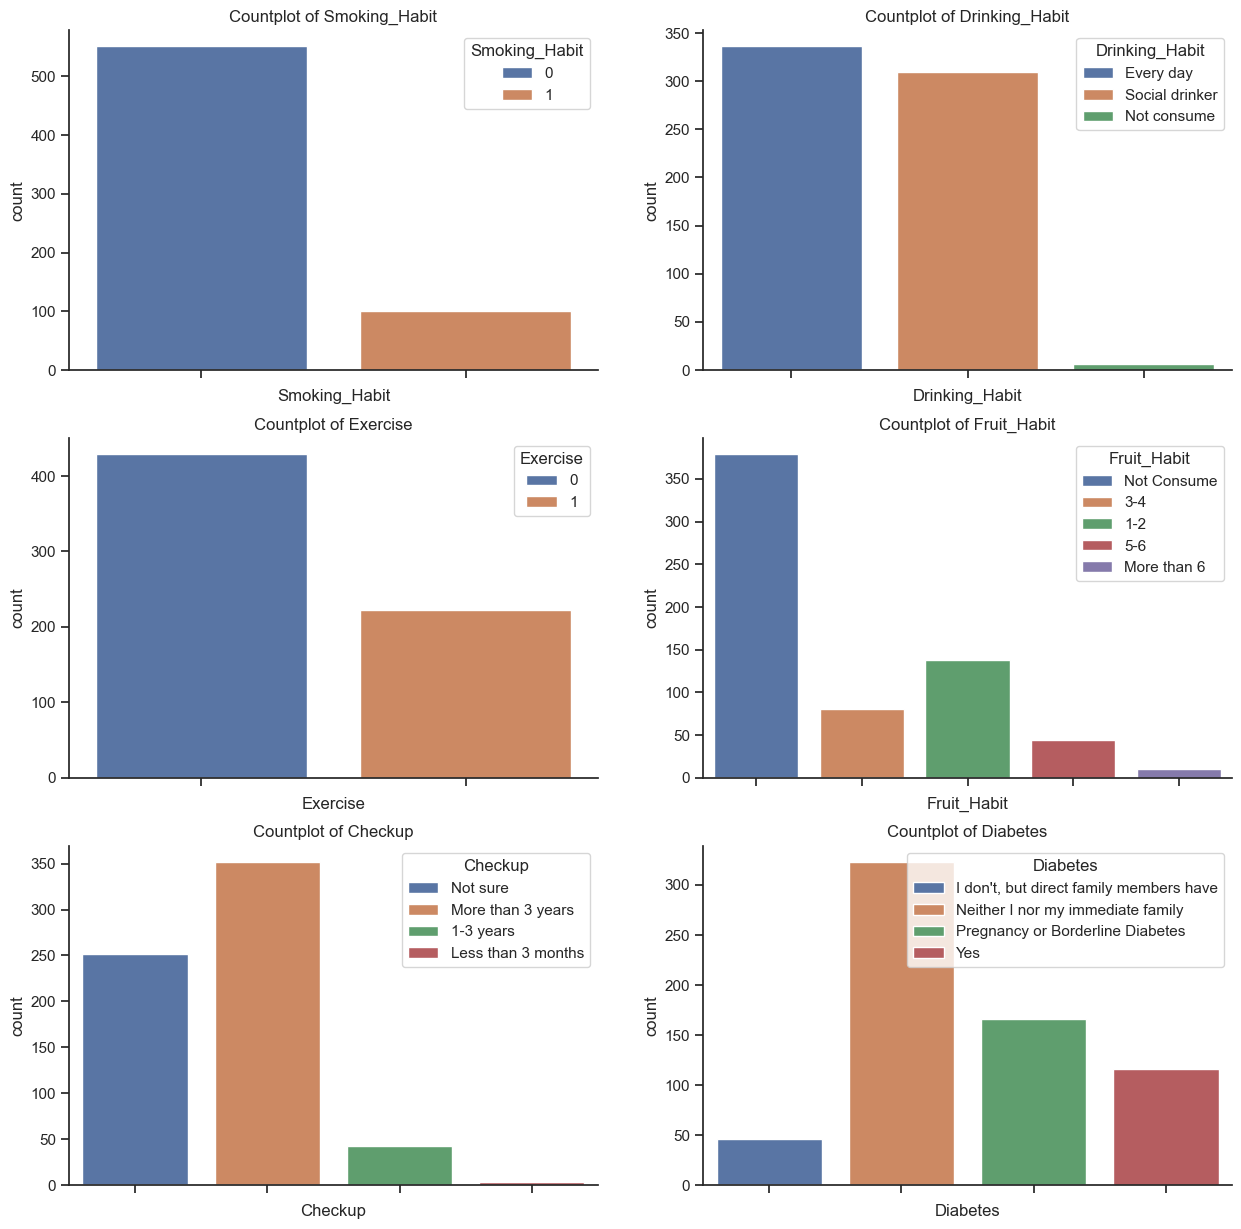

In [542]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
# create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(3, 2)
fig.set_size_inches(15, 15)
vars=train_data_cat_plot.columns.to_list()

for ax, var in zip(axes.flat, vars):
    ctplot=sns.countplot(data=train_data_cat_plot, x=var, dodge=False,ax=ax, hue=var)
    ctplot.set(xticklabels=[])
    ctplot.set_title('Countplot of ' + var)
    
# show the plot
plt.show()

> * Pairplot of the numeric variables

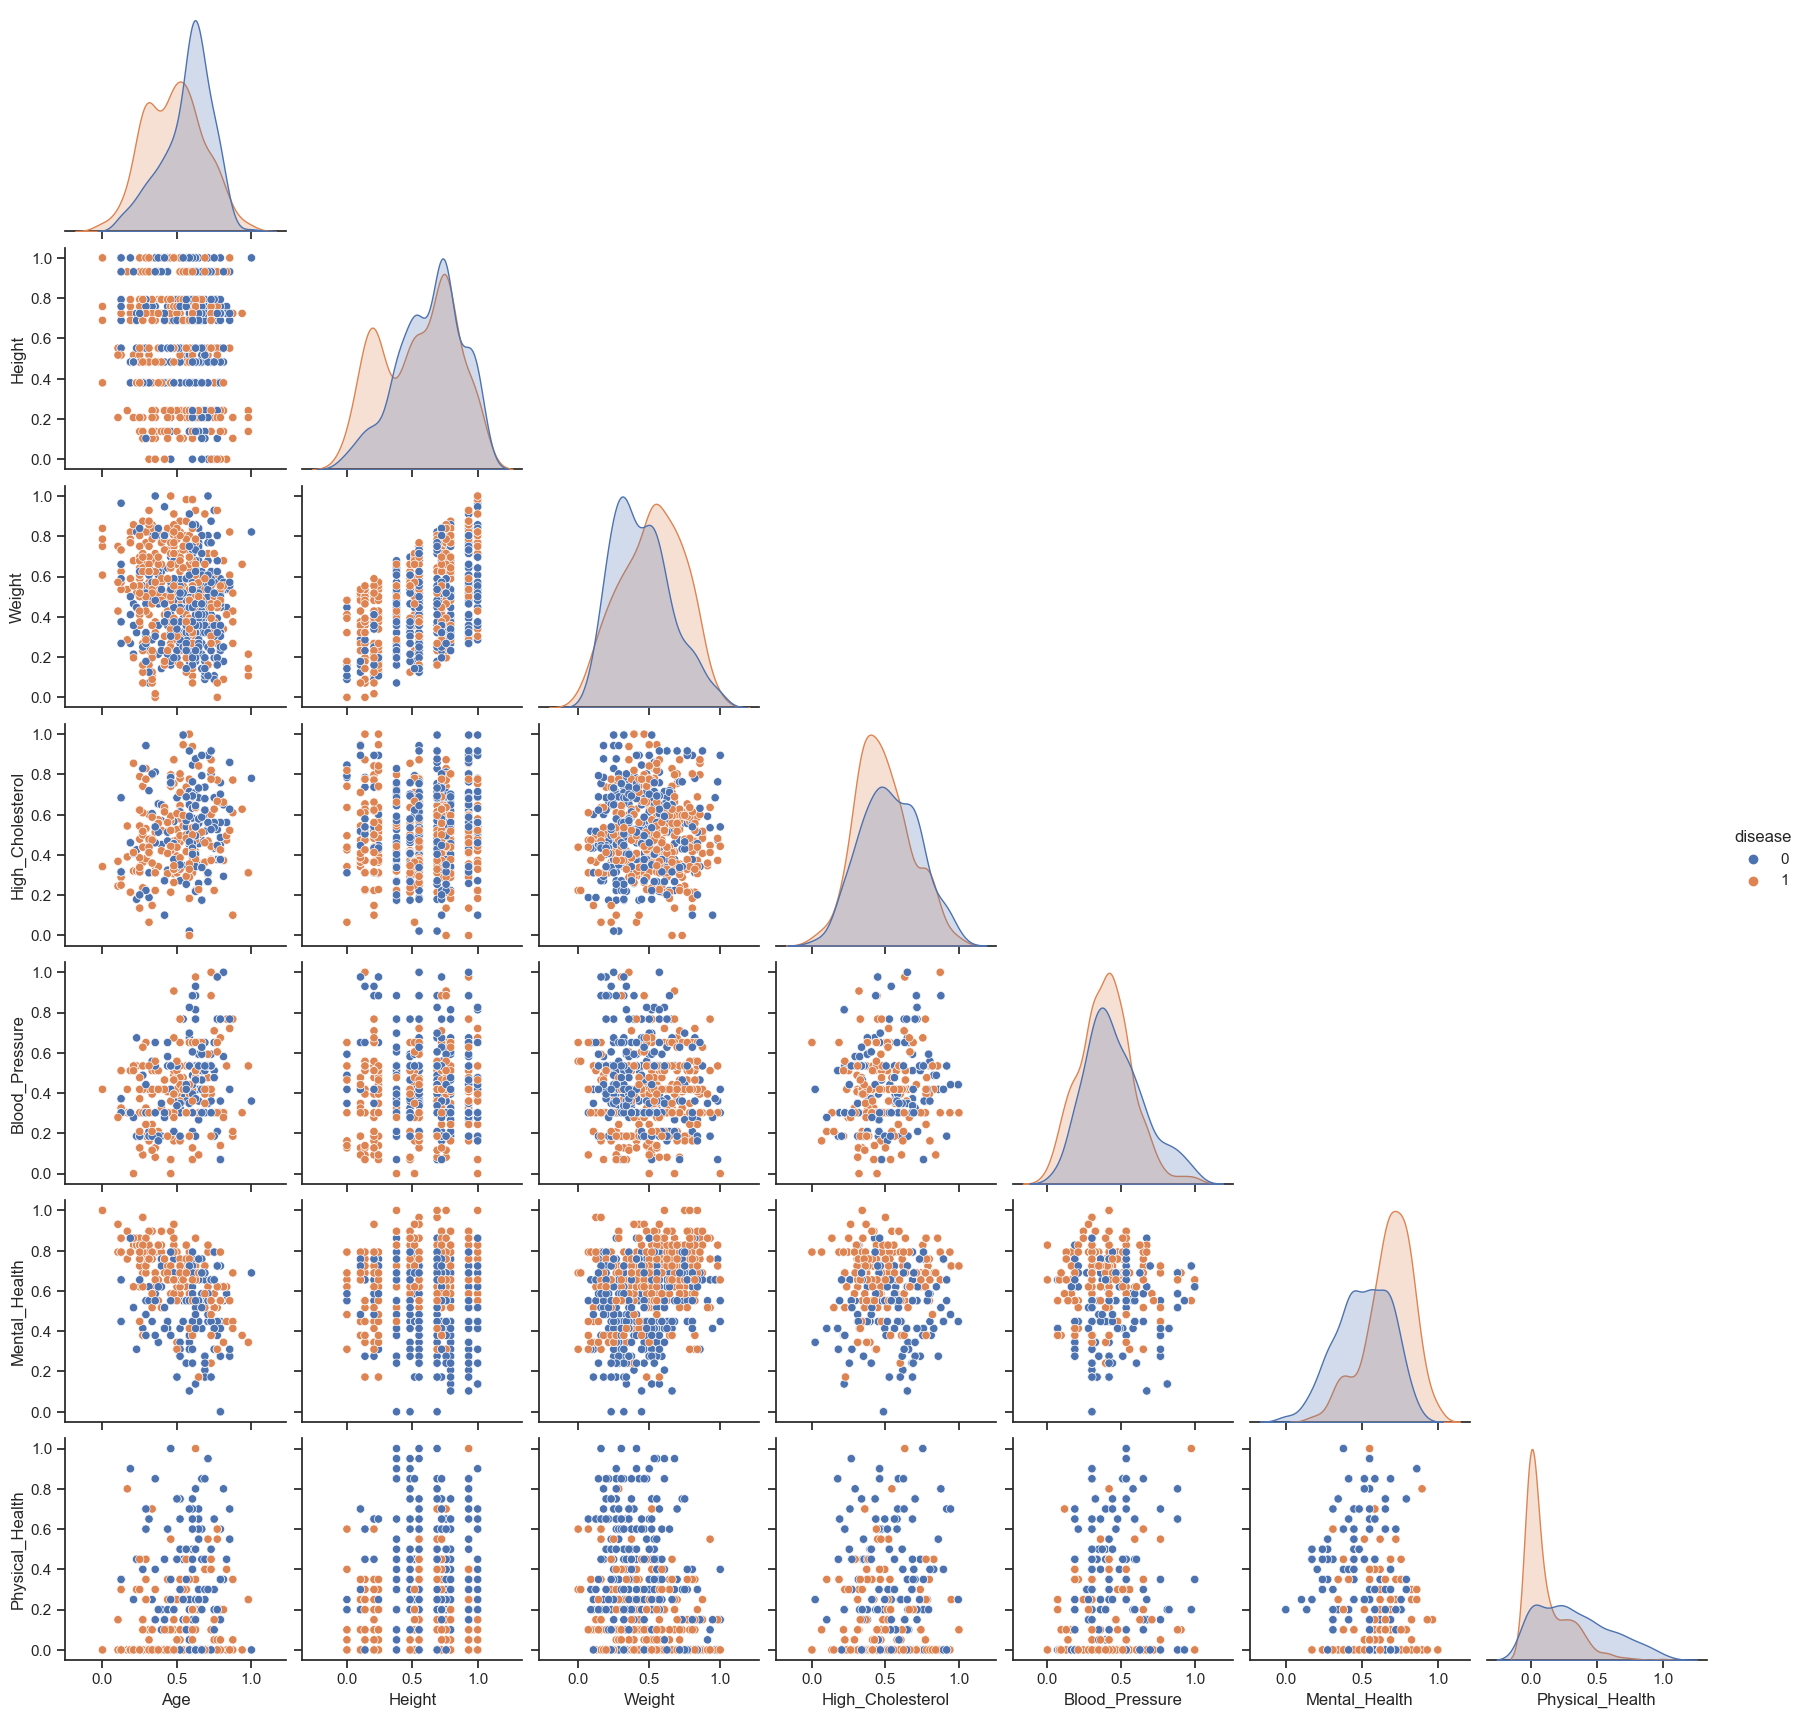

In [543]:
#df used to plot variables
train_data_num_plot=train_data_num_scaled.copy()
train_data_num_plot['disease']=y_train
sns.pairplot(train_data_num_plot, hue = 'disease', corner=True)

<a class="anchor" id="modelling">

## `5. Modelling`
    
</a>

<a class="anchor" id="5-1-bullet">


###  5.1 K Fold

</a>

In [544]:
df_k_fold=pd.concat([X_train,X_test])
df_k_fold_y=pd.concat([y_train, y_test])

In [545]:
def avg_score_KF(split_method,X,y,model):
    score_train = []
    score_test = []
    for train_index, test_index in split_method.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        value_train = model.score(X_train, y_train)
        value_test = model.score(X_test,y_test)
        score_train.append(value_train)
        score_test.append(value_test)

    print('\nTrain average value:' +  str(round(np.mean(score_train),2)) + '+/-' + str(round(np.std(score_train),2)))
    print('Test average value:' +  str(round(np.mean(score_test),2)) + '+/-' + str(round(np.std(score_test),2)))

In [546]:
kf = KFold(n_splits=10)
print('\n GRADIENT BOOSTING')
avg_score_KF(kf, df_k_fold, df_k_fold_y, GradientBoostingClassifier())

print('\n RANDOM FOREST')
avg_score_KF(kf, df_k_fold, df_k_fold_y, RandomForestClassifier())

print('\n NEURAL NETWORK')
avg_score_KF(kf, df_k_fold, df_k_fold_y, MLPClassifier())

print('\n NAIVE BAYES')
avg_score_KF(kf, df_k_fold, df_k_fold_y, GaussianNB())

print('\n LOGISTIC REGRESSION')
avg_score_KF(kf, df_k_fold, df_k_fold_y, LogisticRegression())

print('\n ADA BOOSTING')
avg_score_KF(kf, df_k_fold, df_k_fold_y, AdaBoostClassifier())

print('\n EXTRA TREE CLASSIFIER')
avg_score_KF(kf, df_k_fold, df_k_fold_y, ExtraTreesClassifier())

print('\n SUPPORT VECTOR CLASSIFIER')
avg_score_KF(kf, df_k_fold, df_k_fold_y, SVC())

print('\n BAGGING CLASSIFIER')
avg_score_KF(kf, df_k_fold, df_k_fold_y, BaggingClassifier())


 GRADIENT BOOSTING

Train average value:0.99+/-0.0
Test average value:0.94+/-0.01

 RANDOM FOREST

Train average value:1.0+/-0.0
Test average value:0.98+/-0.01

 NEURAL NETWORK

Train average value:0.95+/-0.01
Test average value:0.9+/-0.04

 NAIVE BAYES

Train average value:0.84+/-0.01
Test average value:0.83+/-0.07

 LOGISTIC REGRESSION

Train average value:0.87+/-0.01
Test average value:0.86+/-0.05

 ADA BOOSTING

Train average value:0.92+/-0.01
Test average value:0.88+/-0.03

 EXTRA TREE CLASSIFIER

Train average value:1.0+/-0.0
Test average value:0.99+/-0.01

 SUPPORT VECTOR CLASSIFIER

Train average value:0.92+/-0.01
Test average value:0.88+/-0.03

 BAGGING CLASSIFIER

Train average value:1.0+/-0.0
Test average value:0.97+/-0.02


In [547]:
df_k_fold.isna().sum()

Age                                                 0
Height                                              0
Weight                                              0
High_Cholesterol                                    0
Blood_Pressure                                      0
Mental_Health                                       0
Physical_Health                                     0
Smoking_Habit                                       0
Exercise                                            0
Gender Male                                         0
Drinking_Habit_Every day                            0
Drinking_Habit_Not consume                          0
Drinking_Habit_Social drinker                       0
Fruit_Habit_1-2                                     0
Fruit_Habit_3-4                                     0
Fruit_Habit_5-6                                     0
Fruit_Habit_More than 6                             0
Fruit_Habit_Not Consume                             0
Checkup_1-3 years           

<a class="anchor" id="5-2-bullet">


###  5.2 Test some models

</a>

<a class="anchor" id="5-2-1-bullet">


> ##### 5.2.1 With Lazy Classifier

</a>

In [548]:
# Install lazyclassifier

#!{sys.executable} -m pip install lazypredict

### _IF THE CELL BELLOW RUNS AN ERROR, PLEASE EXECUTE THE CELL ABOVE!_

In [549]:
# #Lazy Predict helps build a lot of basic models without much code and helps 
# #understand which models works better without any parameter tuning.
# # https://pypi.org/project/lazypredict/
# lazyclassifier = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
# models,predictions = lazyclassifier.fit(X_train, X_test, y_train, y_test)
# print(models)

<a class="anchor" id="5-2-2-bullet">


> ##### 5.2.2 Grid Searches

</a>

In [550]:
# Neural Network
NN = MLPClassifier(solver = 'sgd', learning_rate='adaptive', learning_rate_init = 0.7, hidden_layer_sizes=110,
                     activation='tanh', max_iter=200, random_state=48)
NN.fit(X_train, y_train)

# K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

# Random Forest
RF1 = RandomForestClassifier(class_weight='balanced', n_estimators=110,
                            criterion='gini', max_features=None)
RF1.fit(X_train, y_train)

# Random Forest with log_loss
RF2 = RandomForestClassifier(class_weight='balanced_subsample', n_estimators=90,
                             criterion='log_loss', max_features=None)
RF2.fit(X_train, y_train)

# Gradient Boosting
GB1= GradientBoostingClassifier(learning_rate=0.6,n_estimators=120,criterion='squared_error', loss='exponential',
                                max_features='sqrt' )
GB1.fit(X_train, y_train)

# Gradient Boosting with log_loss
GB2= GradientBoostingClassifier(learning_rate=0.3,n_estimators=140,criterion='squared_error', loss='log_loss',
                                max_features='log2' )
GB2.fit(X_train, y_train)

#Extra Tree Classifier
etc = ExtraTreesClassifier(class_weight='balanced_subsample', random_state=22, n_estimators=140, criterion='log_loss', max_features='log2')
etc.fit(X_train, y_train)

#Logistic Regression
logistic = LogisticRegression().fit(X_train, y_train)

#ADA Boost
adaboost = AdaBoostClassifier(n_estimators=100, random_state=0).fit(X_train,y_train)

#Decision Tree
dtree = DecisionTreeClassifier(random_state = 42).fit(X_train, y_train)


In [551]:
# param_grid = {
#     "max_depth": [3,5,10,15,20,25,None],
#     "min_samples_split": [2,5,7,10,13],
#     "min_samples_leaf": [1,2,5,7]
# }
# grid_cv = GridSearchCV(dtree, param_grid, scoring="accuracy", n_jobs=-2, cv=3).fit(X_train, y_train)

In [552]:
# # parameters = [                           
# #               {
# #                 'hidden_layer_sizes': range(90, 150, 10),
# #                 'activation': ['identity', 'logistic', 'tanh', 'relu'],
# #                 'solver' : ['lbfgs', 'sgd', 'adam'],
# #                 'learning_rate' : ["constant", "invscaling", 'adaptive'],
# #                 'learning_rate_init' : [0.3,0.5,0.7],
# #                 'max_iter': range(200,300,50)
# #                 }
# #               ]

# parameter = [                           
#               {
#                 'hidden_layer_sizes': range(90, 130, 10),
#                 'activation': ['tanh', 'relu'],
#                 'learning_rate_init' : [0.3,0.4,0.7,0.8],
#                 'max_iter': range(160,240,10)
#                 }
#               ]
# grid_search = GridSearchCV(MLPClassifier(learning_rate='adaptive', solver='sgd'), param_grid=parameter, scoring="accuracy")

# grid_search.fit(X_train, y_train)
# print(f"Best parameters : \n\n{grid_search.best_params_}")
# df = pd.DataFrame(grid_search.cv_results_)
# # df = df[['param_hidden_layer_sizes','param_activation','param_solver','param_learning_rate','param_learning_rate_init',
# #          'param_max_iter','mean_test_score','rank_test_score']]
# #print(df.sort_values('rank_test_score'))
# df=df[['param_hidden_layer_sizes','param_activation','param_learning_rate_init','param_max_iter','mean_test_score','rank_test_score']]

# df.sort_values('rank_test_score', inplace=True)
# df

In [553]:
# parameters2 = [                           
#               {
#                 'algorithm': ['SAMME', 'SAMME.R'],
#                 'learning_rate':  [0.5, 0.7, 1, 1.2,1.5],
#                 'n_estimators' : range(50,100,10),
#                 }
#               ]


# grid_search = GridSearchCV(AdaBoostClassifier(), param_grid=parameters2, scoring="accuracy")

# grid_search.fit(X_train, y_train)
# #df = pd.DataFrame(grid_search.cv_results_['param_loss','param_criterion','param_max_features','rank_test_score'])
# df = pd.DataFrame(grid_search.cv_results_)
# df = df[['param_algorithm','param_n_estimators','param_learning_rate',
#         'mean_test_score','rank_test_score']]
# #print(df.sort_values('rank_test_score'))
# #print(f"Best parameters : \n\n{grid_search.best_params_}")
# df.sort_values('rank_test_score', inplace=True)
# df

In [554]:
# parameters3 = [                           
#               {
#                 'class_weight':['balanced', 'balanced_subsample'],
#                 'n_estimators' : range(90,150,10),
#                 'criterion' : ["entropy", 'log_loss'],
#                 'max_features': ['sqrt', 'log2'],
#                 'max_depth':[19,20,21]
#                 }
#               ]


# grid_search = GridSearchCV(ExtraTreesClassifier(), param_grid=parameters3, scoring="accuracy")

# grid_search.fit(X_train, y_train)
# #df = pd.DataFrame(grid_search.cv_results_['param_loss','param_criterion','param_max_features','rank_test_score'])
# df = pd.DataFrame(grid_search.cv_results_)
# df = df[['param_class_weight','param_n_estimators','param_criterion','param_max_features','param_max_depth',
#         'mean_test_score','rank_test_score']]
# #print(df.sort_values('rank_test_score'))
# #print(f"Best parameters : \n\n{grid_search.best_params_}")
# df.sort_values('rank_test_score', inplace=True)
# df

<a class="anchor" id="evaluation">

## `6. Evaluation`
    
</a>

In [555]:
def train_test_accuracy(model):
      train_accuracy=metrics.accuracy_score(y_train, model.predict(X_train))*100
      test_accuracy=metrics.accuracy_score(y_test, model.predict(X_test))*100
      return train_accuracy, test_accuracy

def f1_score(model):
      return metrics.f1_score(y_test,model.predict(X_test)) 

In [556]:
models=[NN, KNN, RF1, RF2, GB1,  GB2,  logistic, etc, dtree]
models_names=['NN', 'KNN', 'RF1', 'RF2', 'GB1', 'GB2',  'logistic', 'etc', 'dtree']
models_acc=list(map(train_test_accuracy, models))
result_tuple = list(map(list, zip(*models_acc)))
train_acc, test_acc = result_tuple

results = pd.DataFrame({
    'Model': models_names,
    'Score': list(map(f1_score, models)),
    'Train Acc': train_acc,
    'Test Acc': test_acc
    })
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df


,Score,Train Acc,Test Acc
Model,,,
etc,1.00,100.00,100.00
NN,0.98,99.69,98.33
RF2,0.98,100.00,97.50
GB1,0.98,100.00,97.50
RF1,0.97,100.00,96.67
GB2,0.97,100.00,96.67
dtree,0.96,100.00,95.83
logistic,0.85,87.40,83.33
KNN,0.82,93.70,80.83


In [557]:
y_pred_etc=etc.predict(X_test)

y_pred_gb1 = GB1.predict(X_test)

In [558]:
def plot_confusion_matrix(pred, model):
    #Generate the confusion matrix
    cf_matrix = confusion_matrix(y_test, pred)

    group_names = ['True Neg','False Pos','False Neg','True Pos']

    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                        cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n' + model + '\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

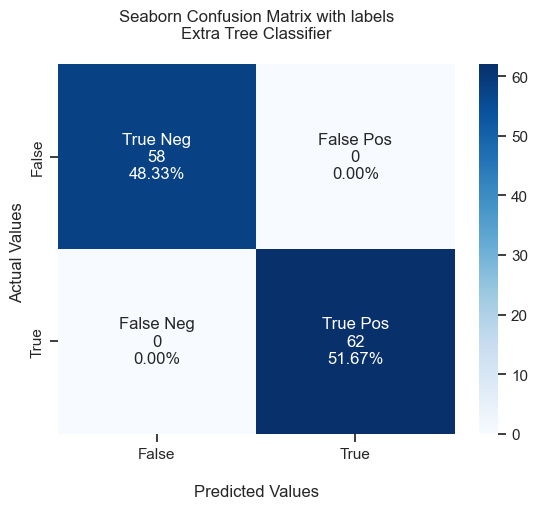

In [559]:
plot_confusion_matrix(y_pred_etc, 'Extra Tree Classifier')

In [560]:
# plot_confusion_matrix(y_pred_gb1, 'Gradient Boosting')

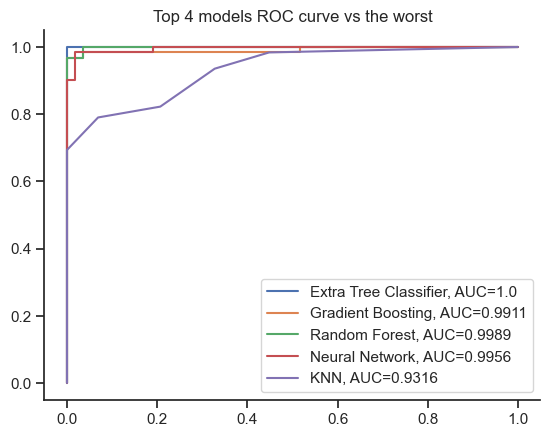

In [561]:
#set up plotting area
plt.figure(0).clf()

#ETC
y_pred_etc_proba = etc.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_etc_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_etc_proba), 4)
plt.plot(fpr,tpr,label="Extra Tree Classifier, AUC="+str(auc))

#GB1
y_pred_gb1_proba = GB1.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_gb1_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_gb1_proba), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#RF1
y_pred_rf1_proba = RF1.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_rf1_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_rf1_proba), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#NN
y_pred_nn_proba = NN.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_nn_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_nn_proba), 4)
plt.plot(fpr,tpr,label="Neural Network, AUC="+str(auc))

#KNN to see the differences to a bad model
y_pred_knn_proba = KNN.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_knn_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_knn_proba), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

#add legend
plt.legend()
plt.title('Top 4 models ROC curve vs the worst')
plt.show()

In [562]:
print('___________________________________________________________________________________')
print('                              ETC - VALIDATION                                     ')
print('-----------------------------------------------------------------------------------')
print(classification_report(y_test, y_pred_etc))
print(confusion_matrix(y_test, y_pred_etc))
print('___________________________________________________________________________________')
print('                               GB - VALIDATION                                     ')
print('-----------------------------------------------------------------------------------')
print(classification_report(y_test, y_pred_gb1))
print(confusion_matrix(y_test, y_pred_gb1))

___________________________________________________________________________________
                              ETC - VALIDATION                                     
-----------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        62

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

[[58  0]
 [ 0 62]]
___________________________________________________________________________________
                               GB - VALIDATION                                     
-----------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        58
           1       0.98      0.97      0.

In [563]:
importances = pd.DataFrame({'feature':X_train.columns,
                            'importance_ETC':np.round(etc.feature_importances_,3),
                            'importance_GB':np.round(GB1.feature_importances_,3),
                            'importance_RF':np.round(RF1.feature_importances_,3)})
importances.sort_values('importance_ETC',ascending=False).set_index('feature')

,importance_ETC,importance_GB,importance_RF
feature,,,
Fruit_Habit_Not Consume,0.09,0.06,0.11
Checkup_More than 3 years,0.08,0.02,0.17
Mental_Health,0.08,0.08,0.07
Physical_Health,0.08,0.11,0.10
Diabetes_Neither I nor my immediate family,0.07,0.07,0.12
Age,0.07,0.07,0.09
High_Cholesterol,0.06,0.10,0.09
Exercise,0.06,0.12,0.01
Checkup_Not sure,0.05,0.08,0.02


<a class="anchor" id="deployment">

## `7. Deployment`
    
</a>

In [564]:
res=etc.predict(test_data)
list_tuples = list(zip(test_data.index, res))
predictions = pd.DataFrame(list_tuples, columns=['PatientID', 'Disease'] )

predictions.set_index('PatientID', inplace=True)
predictions.to_csv("predictions_v37.csv")